## Содержание<a id="step4"></a>
1. [Количество магазинов формата стрит в тестовой выборке](#step1)
2. [Количество магазинов с бесплатной парковкой](#step2)
3. [Средняя выручка магазинов формата мини ТЦ за 2016 год](#step3)

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
import numpy as np
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()


## Загрузка данных

In [2]:
model = pd.read_excel('model_x2.xlsx')
model.head()

,id точки,Адрес,Широта,Долгота,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,Парковка,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
0,8955.0,"Оренбургская обл, Оренбург г, Шарлыкское ш, дом № 1/2, ТЦ ""Армада""",55.1,51.8,2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,бесплатная парковка,3,с 10:00 до 22:00,nan,0,0,1.0,7.0,37.9,69.5,Обучающая
1,11007.0,"Алтайский край, г. Барнаул, ул. Малахова, дом № 86В, ТРЦ ""Весна""",83.7,53.4,2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,nan,0,1,nan,9.0,57.8,66.9,Обучающая
2,11366.0,"Амурская область, Благовещенск, улица Мухина, 114",127.5,50.3,2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,бесплатная парковка,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,50.0,68.7,Обучающая
3,11810.0,"Архангельская обл, г. Архангельск , Троицкий пр., дом № 17, ТРЦ ""Европарк""",40.5,64.5,2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,бесплатная парковка,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.5,64.5,Обучающая
4,15041.0,"Архангельская обл, г. Архангельск, Троицкий пр., дом № 20, ТК ""Гранд Плаза""",40.5,64.5,2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,бесплатная парковка,цоколь,с 10:00 до 21:00,3.0,1,0,nan,0.0,103.2,78.3,Тестовая


In [46]:
model.duplicated().sum()

0

### Посмотрим на уникальные значения столбца Формат магазина

In [3]:
model['Формат магазина'].unique()

array(['ТЦ', 'Street', 'Мини ТЦ', 'Стрит', 'Мини-ТЦ', 'Strееt', 'Стрт'],
      dtype=object)

### Некоторые значения дублируются или оченть похожи по смслу. Объединим их

In [4]:
model['Формат магазина']=model['Формат магазина'].replace('Мини ТЦ','Мини-ТЦ')
model['Формат магазина']=model['Формат магазина'].replace('Strееt','Street')
model['Формат магазина']=model['Формат магазина'].replace('Стрит','Street')
model['Формат магазина']=model['Формат магазина'].replace('Стрт','Street')

In [5]:
model['Формат магазина'].unique()

array(['ТЦ', 'Street', 'Мини-ТЦ'], dtype=object)

### Теперь у нас 3 формата мазазинов

## Количество магазинов формата стрит в тестовой выборке <a id="step1"></a>

### Отфильтруем магазины, которые попали в тестовую выборку

In [6]:
model_test = model.query("Выборка =='Тестовая'")
count_type = model_test.groupby('Формат магазина').agg({'Формат магазина': 'count'})
count_type.columns = ['Количество']
count_type = count_type.sort_values('Количество',
                                    ascending=False)
count_type

,Количество
Формат магазина,
ТЦ,63
Street,7
Мини-ТЦ,7


### Визуализируем данные

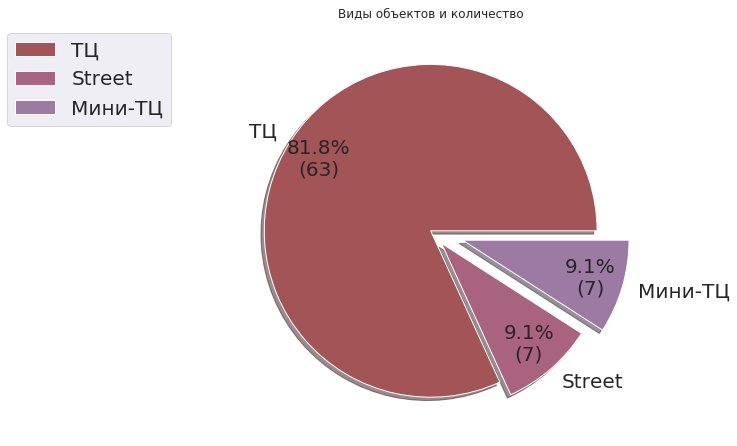

In [7]:
summary = count_type.values.sum()

# Напишем функцию для подсчета процентовки

def func_pct(pct):
    value = float(pct/100.*summary)
    return "{:.1f}%\n({:.0f})".format(pct, value)

explode = (0,
           0.1,
           0.2
          )
# Оформим график

ax_pie = count_type.plot(kind='pie',
                               y='Количество',
                               use_index=False,
                               shadow=True,
                               explode=explode,
                               title = 'Виды объектов и количество',  
                               fontsize=20,
                               pctdistance=0.8,
                               figsize=(12,6), 
                               autopct=lambda pct: func_pct(pct),
                               colors=['#A25457',
                                       '#AA637E',
                                       '#9D7AA3'])

plt.tight_layout(pad=0)

legend = ax_pie.legend(['ТЦ',
                        'Street',
                        'Мини-ТЦ'], 
                       bbox_to_anchor=(-0.1,1), 
                       prop={'size':20})

y_label = ax_pie.set_ylabel('')

### В тестовой выборке количество магазинов street 7(9% от всей тестовой выборки)

##  [К содержанию](#step4)

## Количество магазинов с бесплатной парковкой<a id="step2"></a>

### Посмотрим на уникальные значения столбца Парковка

In [8]:
model['Парковка'].unique()

array(['бесплатная парковка', 100, nan, 'платная парковка',
       'нет парковки', 1000, 700, 'бесплатная паpковка'], dtype=object)

### Значения повторяются, а также есть числовые значения - 100,1000,700. На мой взгляд это количество парковочных мест, а не цена, и я думаю, что их можно прибавить к числу бесплатных парковок, но в реальной жизни лучше уточнить у заказчика, или провести самостоятельный анализ

In [9]:
model['Парковка']=model['Парковка'].replace('бесплатная паpковка','бесплатная парковка')
model['Парковка']=model['Парковка'].replace(100,'бесплатная парковка')
model['Парковка']=model['Парковка'].replace(700,'бесплатная парковка')
model['Парковка']=model['Парковка'].replace(1000,'бесплатная парковка')

### Сгруппируем данные по типу парковок

In [10]:
parking = model.groupby('Парковка').agg({'Парковка': 'count'})
parking.columns = ['Количество']
parking = parking.sort_values('Количество',ascending=False)
parking

,Количество
Парковка,
бесплатная парковка,161
нет парковки,34
платная парковка,31


### Визуализируем данные

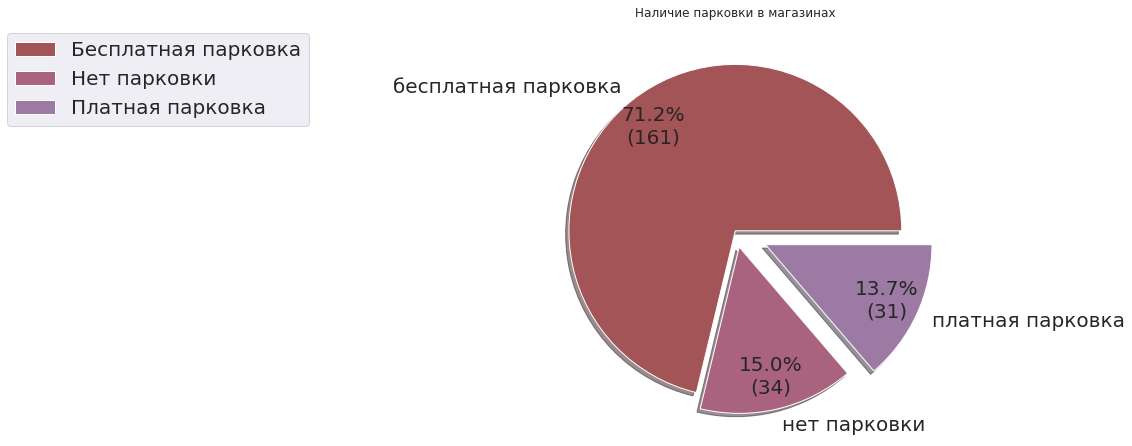

In [11]:
summary = parking.values.sum()

# Напишем функцию для подсчета процентовки

def func_pct(pct):
    value = float(pct/100.*summary)
    #mean = visits_by_device.mean()
    return "{:.1f}%\n({:.0f})".format(pct, value)

explode = (0,
           0.1,
           0.2,
          )
# Оформим график

ax_pie = parking.plot(kind='pie',
                               y='Количество',
                               use_index=False,
                               shadow=True,
                               explode=explode,
                               title = 'Наличие парковки в магазинах',  
                               fontsize=20,
                               pctdistance=0.8,
                               figsize=(12,6), 
                               autopct=lambda pct: func_pct(pct),
                               colors=['#A25457',
                                       '#AA637E',
                                       '#9D7AA3'])

plt.tight_layout(pad=0)

legend = ax_pie.legend(['Бесплатная парковка',
                        'Нет парковки',
                        'Платная парковка'], 
                       bbox_to_anchor=(-0.5,1), 
                       prop={'size':20})

y_label = ax_pie.set_ylabel('')

### 161(71%) магазинов имеет бесплатную парковку

##  [К содержанию](#step4)

## Средняя выручка магазинов формата мини ТЦ за 2016 год <a id="step3"></a>

### Загрузим данные по выручке за 2016 год

In [12]:
revenue = pd.read_excel('revenue.xlsx')
revenue = revenue [['id точки','2016-01-01','2016-02-01','2016-03-01','2016-04-01','2016-05-01','2016-06-01',
                    '2016-07-01','2016-08-01','2016-09-01','2016-10-01','2016-11-01','2016-12-01']]

revenue.head()

,id точки,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01
0,11366.0,219926.7,282913.6,358303.6,248019.6,284416.6,279647.1,230446.6,239083.6,266376.8,295779.8,295160.6,576854.0
1,11810.0,246497.6,331011.7,414184.5,258794.3,254278.5,269684.6,263583.2,286720.1,260873.8,303189.9,270547.6,519262.7
2,15041.0,179593.3,244073.6,285598.2,221318.3,225292.7,203248.8,187544.4,208146.3,217143.0,205033.1,192618.0,347437.7
3,15775.0,401977.2,528602.9,605876.9,446928.0,434807.4,427732.5,397032.3,402138.2,415707.5,449122.5,447313.8,932443.2
4,16102.0,399725.4,518929.7,592577.8,441552.7,449032.8,413248.4,377791.2,395019.0,408141.0,461964.5,452770.5,879288.5


### Перевед данные в числовой формат

In [13]:
col_list= list(revenue)
col_list.remove('id точки')

In [14]:
revenue[col_list] = revenue[col_list].apply(pd.to_numeric,
                                            errors='coerce',
                                            axis=1)

### Для определения, к какому типу магазина относится id сгруппирируем данные из первой таблицы и добавим их в таблицу с выручкой

In [15]:
name_tc = model[['id точки','Формат магазина']]
name_tc.head()

,id точки,Формат магазина
0,8955.0,ТЦ
1,11007.0,ТЦ
2,11366.0,ТЦ
3,11810.0,ТЦ
4,15041.0,ТЦ


In [16]:
revenue_m = name_tc.merge(revenue)
revenue_m.head()

,id точки,Формат магазина,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01
0,11366.0,ТЦ,219926.7,282913.6,358303.6,248019.6,284416.6,279647.1,230446.6,239083.6,266376.8,295779.8,295160.6,576854.0
1,11810.0,ТЦ,246497.6,331011.7,414184.5,258794.3,254278.5,269684.6,263583.2,286720.1,260873.8,303189.9,270547.6,519262.7
2,15041.0,ТЦ,179593.3,244073.6,285598.2,221318.3,225292.7,203248.8,187544.4,208146.3,217143.0,205033.1,192618.0,347437.7
3,15775.0,ТЦ,401977.2,528602.9,605876.9,446928.0,434807.4,427732.5,397032.3,402138.2,415707.5,449122.5,447313.8,932443.2
4,16102.0,ТЦ,399725.4,518929.7,592577.8,441552.7,449032.8,413248.4,377791.2,395019.0,408141.0,461964.5,452770.5,879288.5


In [17]:
col_list= list(revenue_m)
col_list.remove('id точки')
col_list

['Формат магазина',
 '2016-01-01',
 '2016-02-01',
 '2016-03-01',
 '2016-04-01',
 '2016-05-01',
 '2016-06-01',
 '2016-07-01',
 '2016-08-01',
 '2016-09-01',
 '2016-10-01',
 '2016-11-01',
 '2016-12-01']

### Добавим средние и итоговые значения за год для каждого из магазинов

In [18]:
revenue_m['mean_r'] = revenue_m[col_list].mean(axis=1)
revenue_m['e_sum'] = revenue_m[col_list].sum(axis=1)

In [19]:
revenue_m.head()

,id точки,Формат магазина,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01,mean_r,e_sum
0,11366.0,ТЦ,219926.7,282913.6,358303.6,248019.6,284416.6,279647.1,230446.6,239083.6,266376.8,295779.8,295160.6,576854.0,298077.4,3576928.6
1,11810.0,ТЦ,246497.6,331011.7,414184.5,258794.3,254278.5,269684.6,263583.2,286720.1,260873.8,303189.9,270547.6,519262.7,306552.4,3678628.4
2,15041.0,ТЦ,179593.3,244073.6,285598.2,221318.3,225292.7,203248.8,187544.4,208146.3,217143.0,205033.1,192618.0,347437.7,226420.6,2717047.5
3,15775.0,ТЦ,401977.2,528602.9,605876.9,446928.0,434807.4,427732.5,397032.3,402138.2,415707.5,449122.5,447313.8,932443.2,490806.9,5889682.5
4,16102.0,ТЦ,399725.4,518929.7,592577.8,441552.7,449032.8,413248.4,377791.2,395019.0,408141.0,461964.5,452770.5,879288.5,482503.5,5790041.5


### Сгруппируем данные по типу магазина

In [20]:
mean_tc = revenue_m.groupby('Формат магазина').agg({'mean_r':'mean',
                                                    'e_sum':'sum',
                                                    'id точки':'count'}).sort_values('mean_r'
                                                                                     ,ascending=False)
mean_tc.columns = ['Средняя выручка за 2016',
                   'Общая выручка за 2016',
                   'Число магазинов']
mean_tc

,Средняя выручка за 2016,Общая выручка за 2016,Число магазинов
Формат магазина,,,
Street,627620.2,93324822.8,16
ТЦ,424185.4,483226634.0,111
Мини-ТЦ,323506.3,73986922.3,20


### Средняя выручка в Мини-ТЦ за месяц - 323506.3. Это самый маленький показатель. Лидирует формат стрит - в среднем он генерирует 627620.2 в месяц 

##  [К содержанию](#step4)

In [45]:
model_v=model['Выборка'].value_counts().to_frame().reset_index()
model_v.columns =[['Группа','Количество магазинов']]
model_v

,Группа,Количество магазинов
0,Обучающая,96
1,Тестовая,47
2,-,5
3,Тест,1
